# Przetwarzanie i analiza sygnału EKG

### Mirosław Kuźniar, nr indeksu: 248870

### Ćwiczenie 2

In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Celem cwiczenia jest praktyczne wypróbowanie funkcji numpy.fft
i numpy.ifft do wyznaczania prostej i odwrotnej transformaty Fouriera.

a) Wygeneruj ciag próbek odpowiadajacy fali sinusoidalnej o czestotliwosci 50 Hz i długosci 65536.

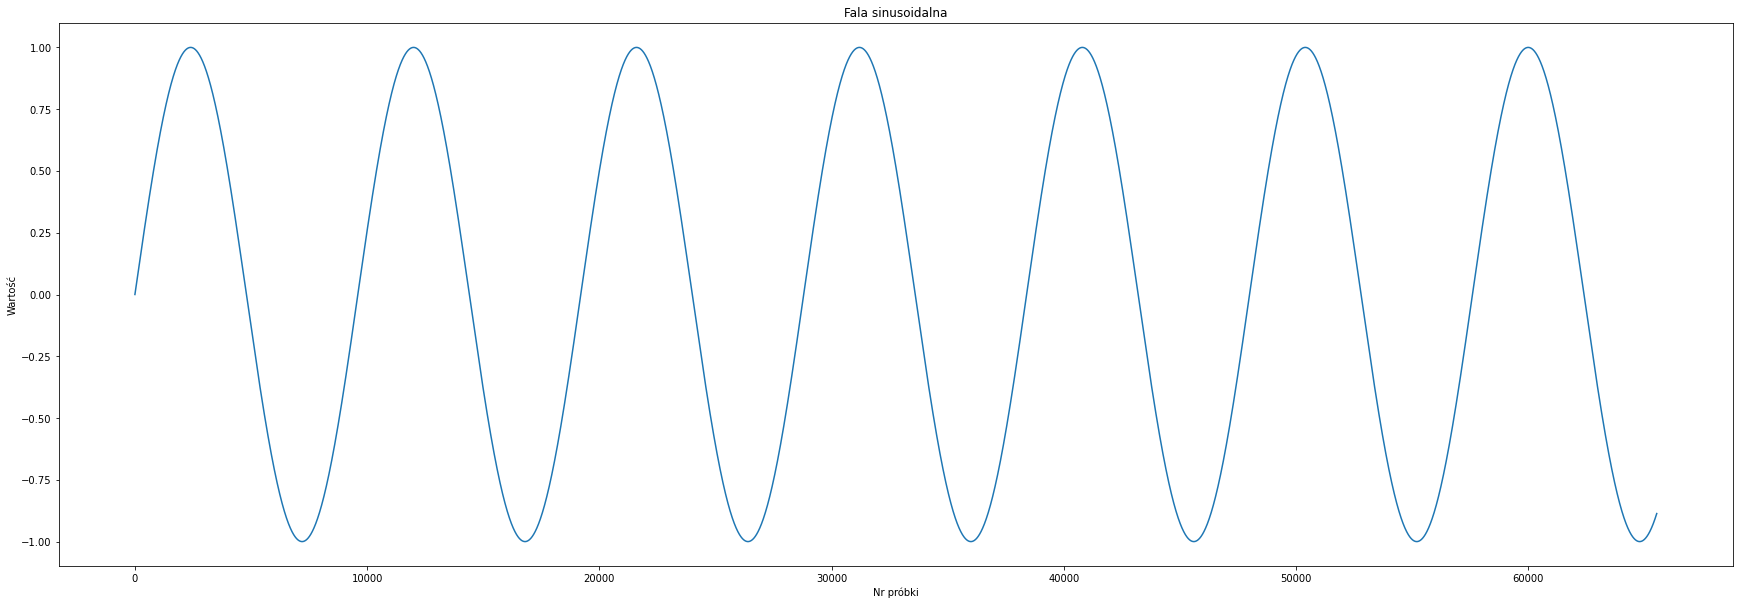

In [3]:
length = 65536 # ustawienie długości 
frequency = 50 # ustawienie częstotliwości

x = np.arange(length) # równomiernie rozmieszczone wartości w przedziale 0 - 65536
y = np.sin(np.pi/240000 * x * frequency) # ustalenie wartości 'y' fali sinusoidalnej

plt.figure(figsize=(30,10))

plt.subplot(1, 1, 1) # wyrysowanie wykresu
plt.plot(x,y)
plt.title('Fala sinusoidalna')
plt.xlabel('Nr próbki')
plt.ylabel('Wartość')

plt.show()

b) Wyznacz dyskretna transformate Fouriera tego sygnału i przedstaw jego widmo
amplitudowe na wykresie w zakresie czestotliwosci [0, fs/2], gdzie fs oznacza
czestotliwosc próbkowania.

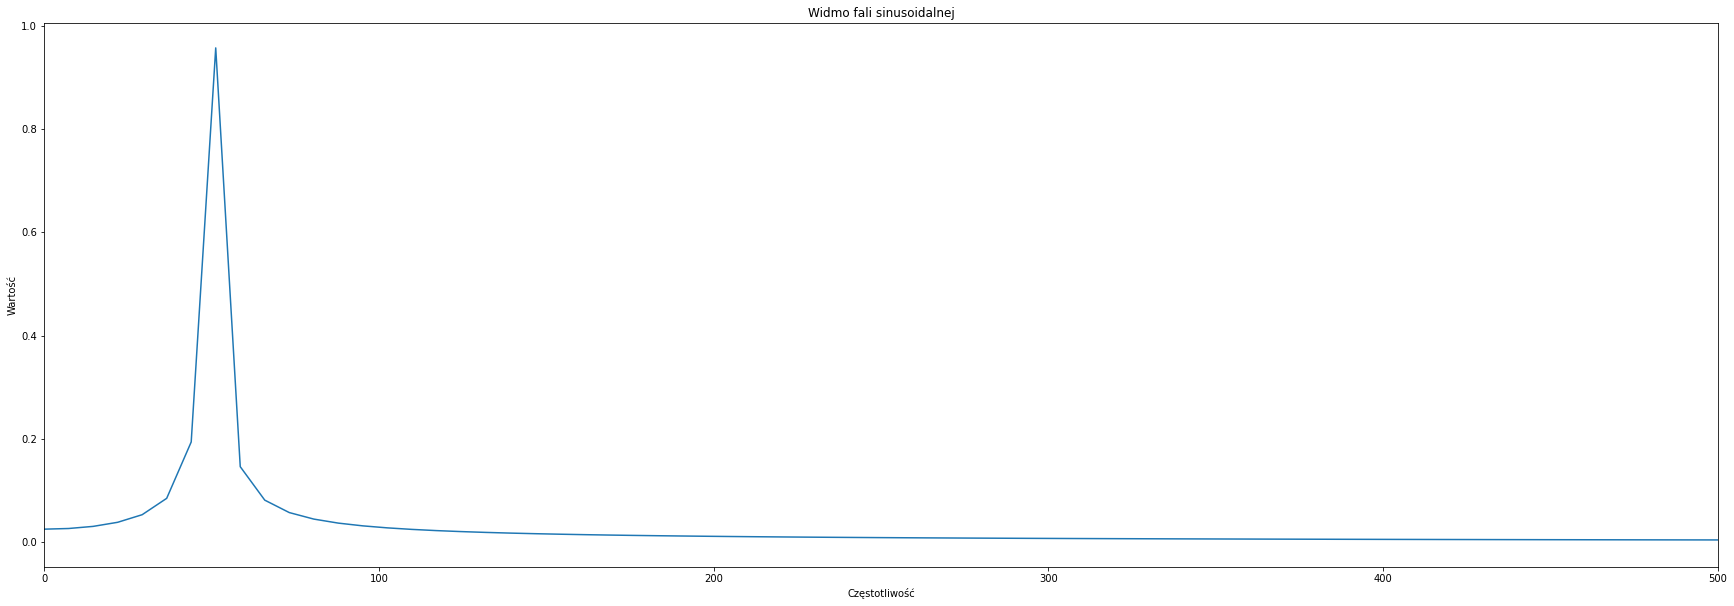

In [4]:
spectrum = np.abs(np.fft.rfft(y)) / (length/2) # jednowymiarowa Dyskretna Transformata Fouriera dla rzeczywistego sygnału wejściowego
frequency = np.fft.rfftfreq(length, 1/480000) # częstotliwości próbkowania Dyskretnej Transformaty Fouriera

plt.figure(figsize=(30,10))

plt.plot(frequency, spectrum) # wyrysowanie wykresu
plt.xlim(0, 500)
plt.xlabel('Częstotliwość')
plt.ylabel('Wartość')
plt.title('Widmo fali sinusoidalnej')

plt.show()               

c) Wygeneruj ciag próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji
liniowej) o czestotliwosciach 50 i 60 Hz. Wykonaj zadanie z punktu 2 dla tego
sygnału.

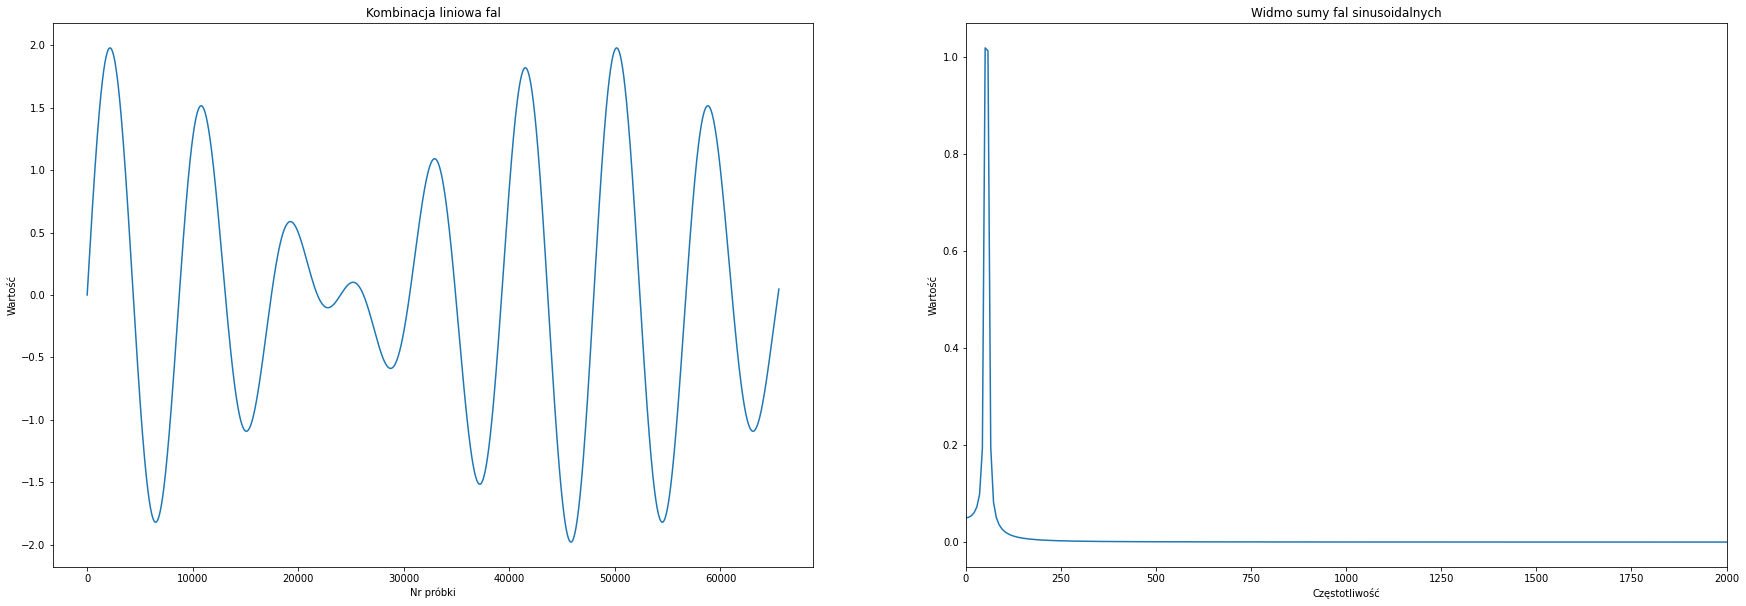

In [5]:
length = 65536 # ustawienie długości 
frequency_50 = 50 # ustawienie częstotliwości 50 Hz
frequency_60 = 60 # ustawienie częstotliwości 60 Hz

x = np.arange(length) # równomiernie rozmieszczone wartości w przedziale 0 - 65536
y_50 = np.sin(np.pi/240000 * x * frequency_50) # ustalenie wartości 'y' fali sinusoidalnej
y_60 = np.sin(np.pi/240000 * x * frequency_60) # ustalenie wartości 'y' fali sinusoidalnej

spectrum_two_sin = np.fft.rfft(y_50 + y_60) # jednowymiarowa Dyskretna Transformata Fouriera dla rzeczywistych sygnałów wejściowych

plt.figure(figsize=(30,10))

plt.subplot(1, 2, 1) # wyrysowanie wykresu
plt.plot(x,y_50 + y_60)
plt.title('Kombinacja liniowa fal')
plt.xlabel('Nr próbki')
plt.ylabel('Wartość')

plt.subplot(1, 2, 2) # wyrysowanie wykresu
plt.plot(frequency, np.abs(spectrum_two_sin) / (length/2))
plt.xlim(0, 2000)
plt.title('Widmo sumy fal sinusoidalnych')
plt.xlabel('Częstotliwość')
plt.ylabel('Wartość')

plt.show()

d) Powtórz eksperymenty dla róznych czasów trwania sygnałów, tzn. dla róznych
czestotliwosci próbkowania.

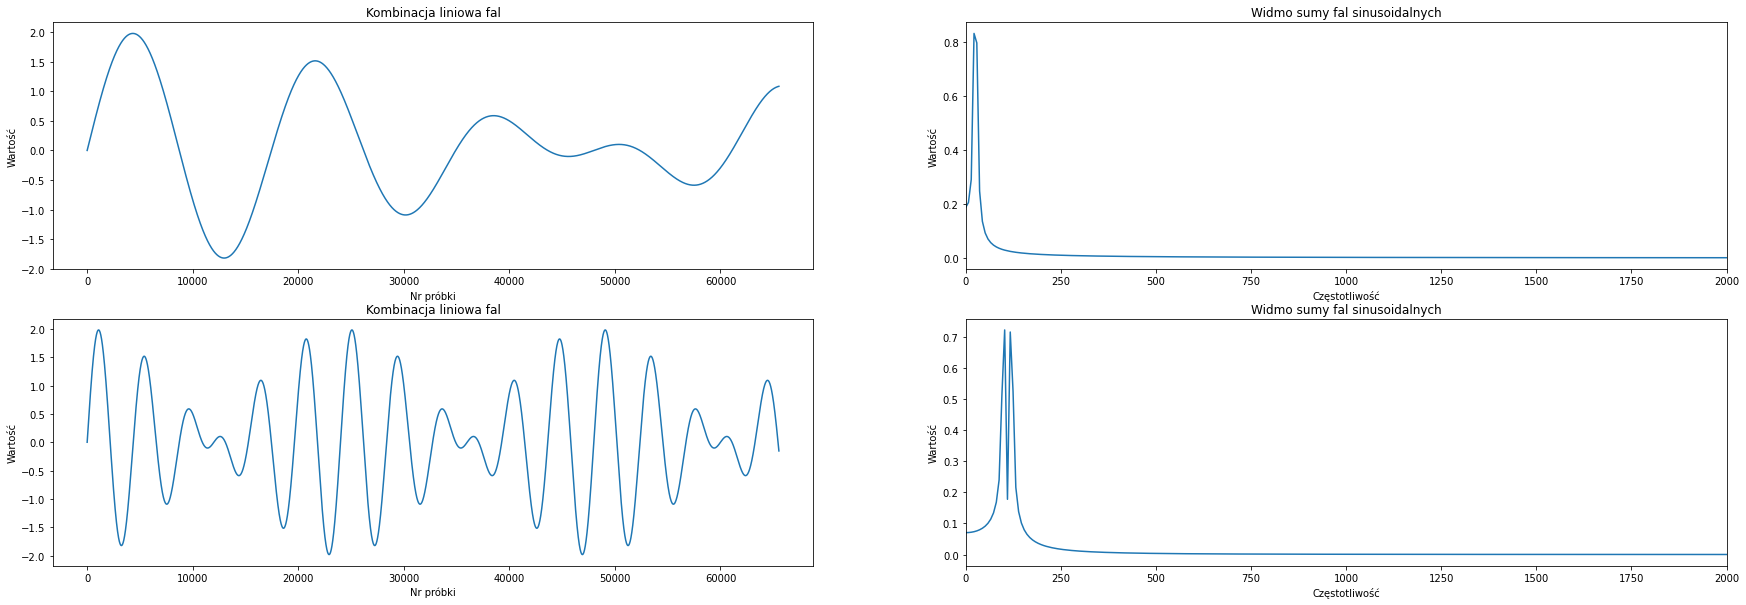

In [6]:
x = np.arange(length) # równomiernie rozmieszczone wartości w przedziale 0 - 65536
y_50 = np.sin(np.pi/480000 * x * frequency_50) # ustalenie wartości 'y' fali sinusoidalnej 50 Hz
y_60 = np.sin(np.pi/480000 * x * frequency_60) # ustalenie wartości 'y' fali sinusoidalnej 60 Hz

spectrum_two_sin = np.fft.rfft(y_50 + y_60) # jednowymiarowa Dyskretna Transformata Fouriera dla rzeczywistych sygnałów wejściowych

plt.figure(figsize=(30,10))

plt.subplot(2, 2, 1) # wyrysowanie wykresu
plt.plot(x,y_50 + y_60)
plt.title('Kombinacja liniowa fal')
plt.xlabel('Nr próbki')
plt.ylabel('Wartość')

plt.subplot(2, 2, 2) # wyrysowanie wykresu
plt.plot(frequency, np.abs(spectrum_two_sin) / (length/2))
plt.xlim(0, 2000)
plt.title('Widmo sumy fal sinusoidalnych')
plt.xlabel('Częstotliwość')
plt.ylabel('Wartość')

x = np.arange(length) # równomiernie rozmieszczone wartości w przedziale 0 - 65536
y_50 = np.sin(np.pi/120000 * x * frequency_50) # ustalenie wartości 'y' fali sinusoidalnej 50 Hz
y_60 = np.sin(np.pi/120000 * x * frequency_60) # ustalenie wartości 'y' fali sinusoidalnej 60 Hz

spectrum_two_sin = np.fft.rfft(y_50 + y_60) # jednowymiarowa Dyskretna Transformata Fouriera dla rzeczywistych sygnałów wejściowych

plt.subplot(2, 2, 3) # wyrysowanie wykresu
plt.plot(x,y_50 + y_60)
plt.title('Kombinacja liniowa fal')
plt.xlabel('Nr próbki')
plt.ylabel('Wartość')

plt.subplot(2, 2, 4) # wyrysowanie wykresu
plt.plot(frequency, np.abs(spectrum_two_sin) / (length/2))
plt.xlim(0, 2000)
plt.title('Widmo sumy fal sinusoidalnych')
plt.xlabel('Częstotliwość')
plt.ylabel('Wartość')

plt.show()

e) Wyznacz odwrotne transformaty Fouriera ciagów wyznaczonych w zadaniu 2
i porównaj z ciagami oryginalnymi.

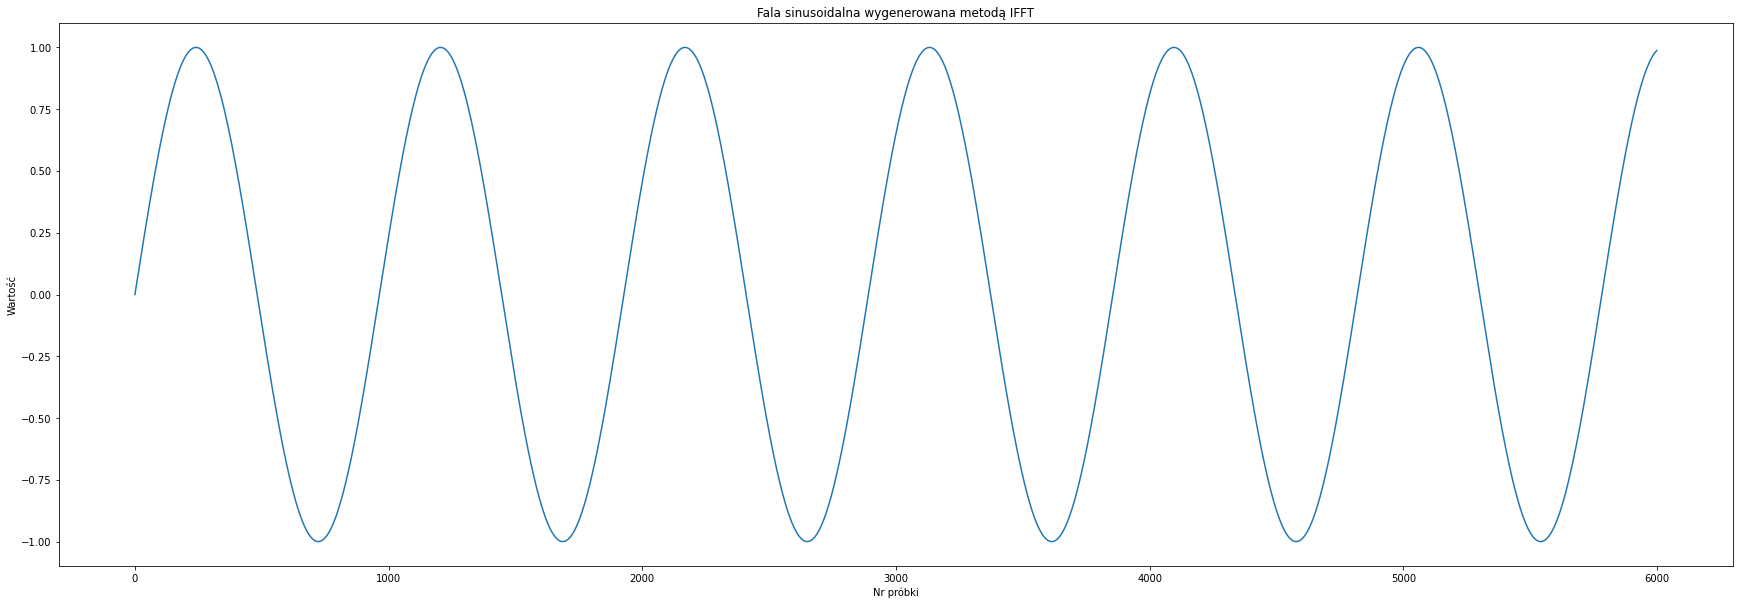

In [7]:
spectrum = np.zeros(32769, dtype=complex) # tablica o podanym kształcie i typie, wypełniona zerami
spectrum[68]= -32768j

plot = np.real(np.fft.irfft(spectrum)) # odwrotna jednowymiarowa Dyskretna Transformata Fouriera dla rzeczywistego sygnału wejściowego

plt.figure(figsize=(30,10))

plt.subplot(1, 1, 1) # wyrysowanie wykresu
plt.plot(plot[:6000])
plt.title('Fala sinusoidalna wygenerowana metodą IFFT')
plt.xlabel('Nr próbki')
plt.ylabel('Wartość')

plt.show()